In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, '/mnt/data/molchanov/dltranz')

from domyshnik.models import *
from domyshnik.data import *
from domyshnik.constants import *

def draw(imgs):
        if isinstance(imgs, list):
            imgs = torch.stack(imgs)
        fig = plt.figure()
        rows, columns = 1, imgs.shape[0]
        for i in range(imgs.shape[0]):
            fig.add_subplot(rows, columns, i+1)
            plt.imshow(imgs[i])
        plt.show()
        
%matplotlib inline

model _params:
        N_AUGMENTS 5
        LEARNING_RATE 0.002
        GAMMA 0.9025
        BATCH_SIZE 128
        EPOCHS 20
        SAMPLING_STRATEGY HardNegativePair
        NEGATIVES_COUNT 6
        MARGING 0.5
        STEP_SIZE 5
        MODEL_POSTFIX 
       


# Metric Learning MNIST Test 

In [ ]:
model = get_mnist_metriclearning_model()
model

In [ ]:
data_loader = get_mnist_test_loader(BATCH_SIZE, n_augments=N_AUGMENTS)
sample = next(iter(data_loader))
data = sample[0].view(-1, sample[0].size(-2), sample[0].size(-1))
draw(sample[0][0])

In [ ]:
embeds = model(sample[0])

In [ ]:
distances = torch.matmul(embeds, embeds.transpose(0, 1))
for i in range(distances.shape[0]):
    distances[i, i] = -100

In [ ]:
for i in range(distances.shape[0]):
    vals, idx = torch.sort(distances[i], descending=True)
    idx = [i] + idx[:N_AUGMENTS + 1].numpy().tolist()
    imgs = data[idx]
    draw(imgs)

# Domyshnik Mnist Test

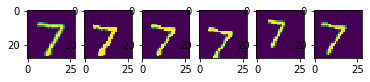

In [2]:
data_loader = get_mnist_test_loader(BATCH_SIZE, n_augments=N_AUGMENTS, augment_labels=True)
sample = next(iter(data_loader))
data = sample[0].view(-1, sample[0].size(-2), sample[0].size(-1))
draw(sample[0][0])

In [3]:
sample[1]

[tensor([1, 6, 1, 6, 0, 4, 9, 1, 0, 9, 2, 3, 6, 8, 9, 5, 1, 0, 4, 1, 4, 5, 8, 4,
         1, 5, 5, 1, 8, 0, 6, 9, 7, 6, 2, 4, 6, 9, 6, 0, 8, 1, 9, 4, 5, 5, 1, 2,
         8, 2, 2, 0, 6, 7, 6, 5, 2, 4, 1, 4, 9, 4, 2, 4, 3, 5, 9, 7, 2, 9, 7, 4,
         3, 4, 3, 0, 5, 8, 7, 6, 7, 0, 5, 5, 7, 8, 9, 8, 6, 4, 4, 3, 1, 6, 8, 0,
         2, 2, 9, 1, 8, 0, 7, 7, 0, 4, 4, 6, 0, 1, 5, 4, 8, 4, 1, 5, 1, 6, 8, 0,
         2, 8, 3, 4, 8, 5, 8, 5]),
 tensor([-0.1000, -0.1000, -1.0000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000,
         -0.1000, -1.0000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -1.0000,
         -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000,
         -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000,
         -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000,
         -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -1.0000, -1.0000, -1.0000,
         -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -1.0000, -0